# Title: Retail Product Optimal Price Determination Model
# Author: Faizan Qureshi

# Table of Contents
## Phase 0: Initial Phase
### Step 1: Install Libraries
### Step 2: Import Libraries
### Step 3: Load Dataset
### Step 4: Initial Inspection

## Phase 1: Exploratory Data Analysis
### Step 1: Correlation Analysis
### Step 2: Price Trend Analysis
### Step 3: Product Category Distribution
### Step 4: Price and Quantity Relationship
### Step 5: Seasonal Trend Line Chart
### Step 6: Competitor Price Heatmap
### Step 7: Competitor Radar Chart
### Step 8: Category Treemap
### Step 9: Key Price Variables
### Step 10: Relationship Visual

## Phase 2: Data Preprocessing
### Step 1: Cleaning Missing Values
### Step 2: Category Encoding
### Step 3: Date Features
### Step 4: Outlier Handling
### Step 5: Fix Data Types
### Step 6: Drop Unused Columns

## Phase 3: Feature Engineering
### Step 1: Moving Averages
### Step 2: Competitor Price Differences
### Step 3: Competitor Advantage Index
### Step 4: Rolling Demand Features
### Step 5: Margin Feature
### Step 6: Freight Ratio
### Step 7: Competitor Gap Percentage
### Step 8: Market Competitor Price Index
### Step 9: Price Volatility
### Step 10: Demand Elasticity Proxy
### Step 11: Interaction Features
### Step 12: Lag Feature
### Step 13: Define Geatures & Target

## Phase 4: Model Development
### Step 1: Train Test Split
### Step 2: Scaling
### Step 3: Linear Regression
### Step 4: Ridge Regression
### Step 5: Random Forest

## Phase 5: Model Evaluation
### Step 1: Define Evaluation Function
### Step 2: Evaluate All Models
### Step 3: Prediction vs Actual Plot
### Step 4: Model Performance Comparison Charts

## Phase 6: Model Explainability
### Step 1: SHAP
### Step 2: SHAP Force Plot
### Step 3: SHAP Waterfall Plot
### Step 4: SHAP Top Features Drivers Table
### Step 5: Permutation Importance

## Phase 7: Model Visualization and Selection
### Step 1: Prediction vs Actual
### Step 2: Model Selection

## Phase 8: Business Pricing Insights Engine
### Step 1: Price Optimization Insights
### Step 2: Pricing Insights Table

## Phase 9: Strategic Pricing Recommendations

## Phase 10: Model Saving

## Phase 11: Model Deployment
### Step 1: Create Flask API
### Step 2: Create Dockerfile for Deployment
### Step 3: How to Build & Run Docker Container

# PHASE 0: INITIAL PHASE

### Step 1: Install Libraries

In [72]:
!pip install --quiet pandas numpy scikit-learn matplotlib seaborn plotly xgboost shap joblib optuna missingno

### Step 2: Import Libraries

In [73]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization and Settings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML Tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.utils import check_array

# Regression Models
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Explainabiliy
from sklearn.inspection import permutation_importance
import shap

# Hyperparameter Optimization
import optuna
import missingno as msno

# Deployment
import joblib
from flask import Flask, request, jsonify

# Warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.style.use("ggplot")

### Step 3: Load Dataset

In [74]:
data = pd.read_csv('synthetic_retail_price.csv')
data.shape

(3000, 30)

### Step 4: Initial Inspection

In [75]:
display(data.head())
print(data.info())
print("Missing per column:")
print(data.isnull().sum())
print("Duplicated rows:", data.duplicated().sum())
display(data.describe(include='all'))
data.isnull().sum().to_frame("Missing Values")

,product_id,product_category_name,month_year,qty,unit_price,freight_price,total_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,800230,sports,2022-03-07,9,426.26,95.79,3836.34,23,231,2,...,414.11,0.04,87.16,482.23,0.15,90.29,479.95,0.79,44.36,442.05
1,704668,beauty,2023-07-19,1,133.41,13.24,133.41,15,210,2,...,133.06,0.35,11.20,146.75,0.47,29.51,140.27,0.70,19.93,144.59
2,936938,sports,2023-04-23,13,525.18,77.62,6827.34,17,162,5,...,627.40,0.69,89.29,508.20,0.23,56.96,513.65,0.79,60.20,487.63
3,964527,sports,2022-11-17,9,166.09,9.29,1494.81,12,90,1,...,146.07,0.42,9.93,154.66,0.69,12.74,183.92,0.83,10.58,160.75
4,734414,kitchen,2022-11-13,15,83.03,4.30,1245.45,22,170,1,...,73.82,0.98,9.77,89.70,0.71,8.43,98.92,0.00,14.57,80.10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  3000 non-null   int64  
 1   product_category_name       3000 non-null   object 
 2   month_year                  3000 non-null   object 
 3   qty                         3000 non-null   int64  
 4   unit_price                  3000 non-null   float64
 5   freight_price               3000 non-null   float64
 6   total_price                 3000 non-null   float64
 7   product_name_lenght         3000 non-null   int64  
 8   product_description_lenght  3000 non-null   int64  
 9   product_photos_qty          3000 non-null   int64  
 10  product_weight_g            3000 non-null   int64  
 11  product_score               3000 non-null   float64
 12  customers                   3000 non-null   int64  
 13  weekday                     3000 

,product_id,product_category_name,month_year,qty,unit_price,freight_price,total_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,NaN,7,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,kitchen,2023-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,470,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,547044.592333,NaN,NaN,10.029000,466.298070,69.918087,4679.223740,14.352333,137.368333,3.023333,...,477.470683,0.494193,72.83000,479.641027,0.497147,71.593380,478.247013,0.501327,71.316580,466.099417
std,258524.429643,NaN,NaN,5.388862,250.359663,48.532636,3831.289669,5.745711,66.413976,1.420843,...,260.985262,0.290313,51.56764,262.823398,0.290453,50.273969,262.505914,0.287828,49.857099,251.522117
min,100000.000000,NaN,NaN,1.000000,30.360000,2.050000,32.120000,5.000000,20.000000,1.000000,...,29.040000,0.000000,1.71000,27.920000,0.000000,2.000000,28.170000,0.000000,1.650000,28.770000
25%,323088.000000,NaN,NaN,5.000000,251.852500,30.640000,1555.825000,9.000000,81.000000,2.000000,...,254.942500,0.240000,31.19750,255.700000,0.250000,31.292500,253.437500,0.250000,32.597500,248.765000
50%,546540.500000,NaN,NaN,10.000000,469.550000,58.880000,3613.880000,14.000000,139.000000,3.000000,...,474.415000,0.500000,60.71500,475.540000,0.500000,59.345000,475.345000,0.500000,59.920000,468.035000
75%,773362.750000,NaN,NaN,15.000000,677.535000,101.832500,6968.130000,19.000000,196.000000,4.000000,...,685.847500,0.740000,104.39500,696.082500,0.750000,101.515000,694.030000,0.750000,102.687500,675.720000


,Missing Values
product_id,0
product_category_name,0
month_year,0
qty,0
unit_price,0
freight_price,0
total_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


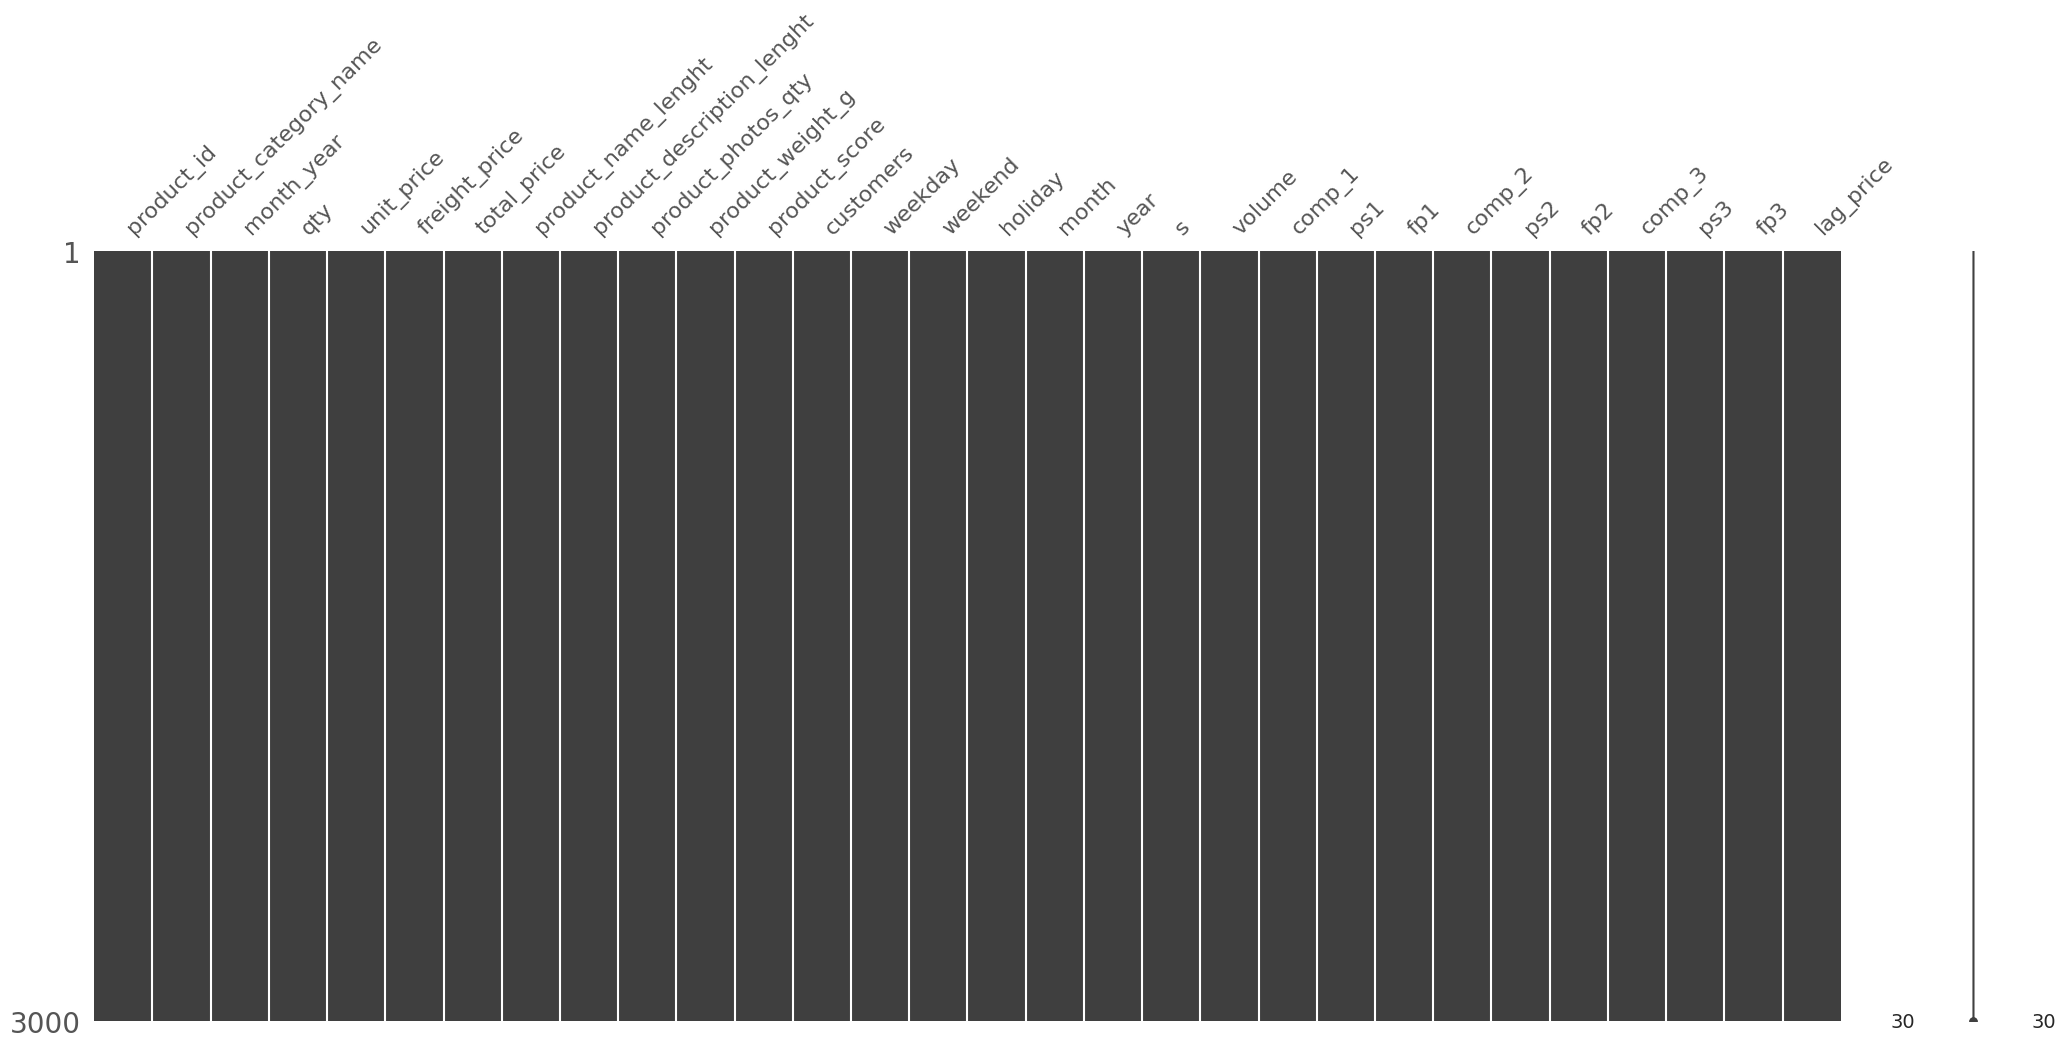

In [76]:
msno.matrix(data)
plt.tight_layout()
plt.show()

In [77]:
# Replace spaces & lower column names for safety
data.columns = [c.strip() for c in data.columns]
# Convert month_year to datetime
data['month_year'] = pd.to_datetime(data['month_year'], errors='coerce')

In [78]:
# Fill simple empty category then numeric imputation with KNN
if 'product_category_name' in data.columns:
    data['product_category_name'] = data['product_category_name'].fillna(data['product_category_name'].mode().iloc[0])

# Numeric imputation with KNN for numeric columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
data[num_cols] = imputer.fit_transform(data[num_cols])

In [79]:
# Remove extreme outliers on unit_price using IQR AFTER imputation
if 'unit_price' in data.columns:
    Q1 = data['unit_price'].quantile(0.25)
    Q3 = data['unit_price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data['unit_price'] >= lower_bound) & (data['unit_price'] <= upper_bound)].copy()
    data = data.reset_index(drop=True)

# PHASE 1: EXPLORATORY DATA ANALYSIS

### Step 1: Correlation Analysis

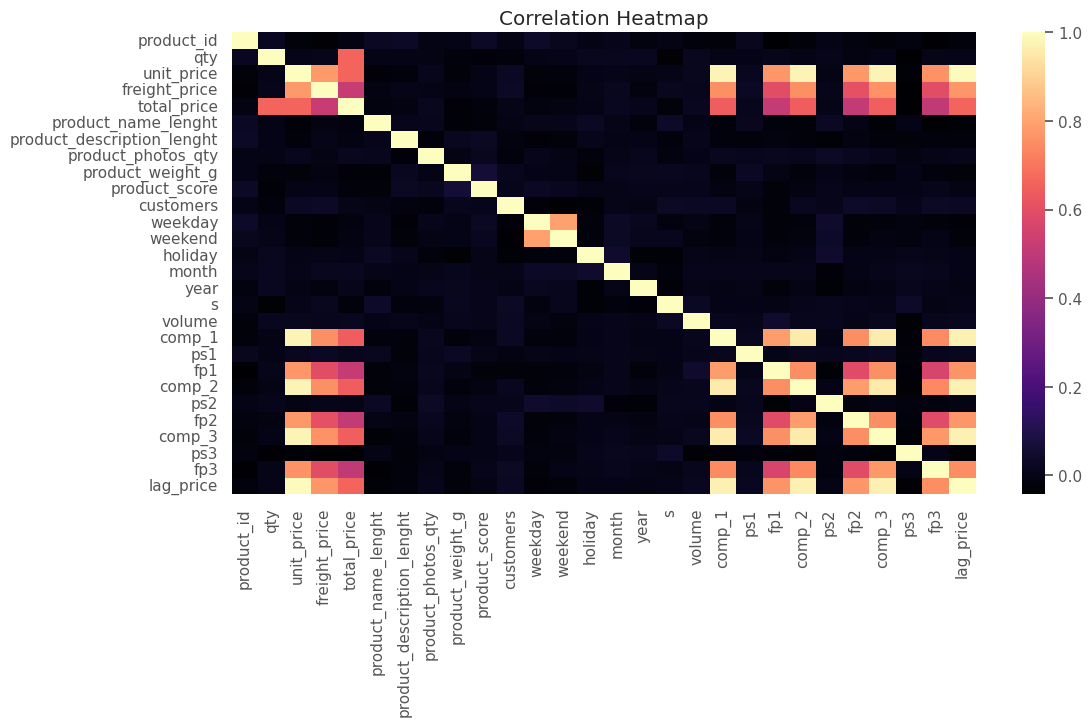

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), cmap="magma")
plt.title("Correlation Heatmap")
plt.show()

### Step 2: Price Trend Analysis

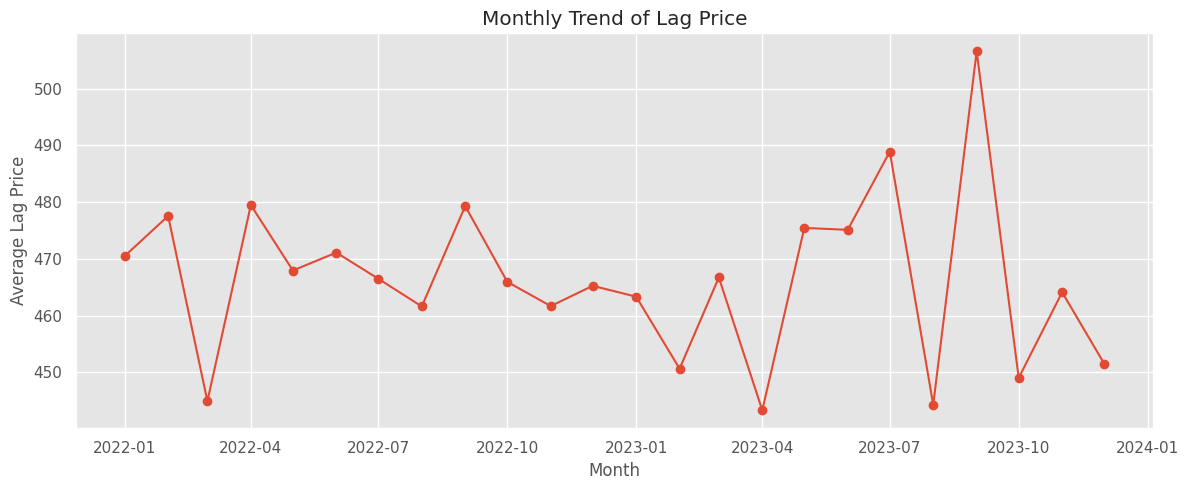

In [81]:
if 'month_year' in data.columns and 'lag_price' in data.columns:
    monthly = data.groupby(data['month_year'].dt.to_period("M"))['lag_price'].mean()
    monthly.index = monthly.index.to_timestamp()
    plt.figure(figsize=(12,5))
    plt.plot(monthly.index, monthly.values, marker="o")
    plt.title("Monthly Trend of Lag Price")
    plt.xlabel("Month")
    plt.ylabel("Average Lag Price")
    plt.tight_layout()
    plt.show()

### Step 3: Product Category Distribution

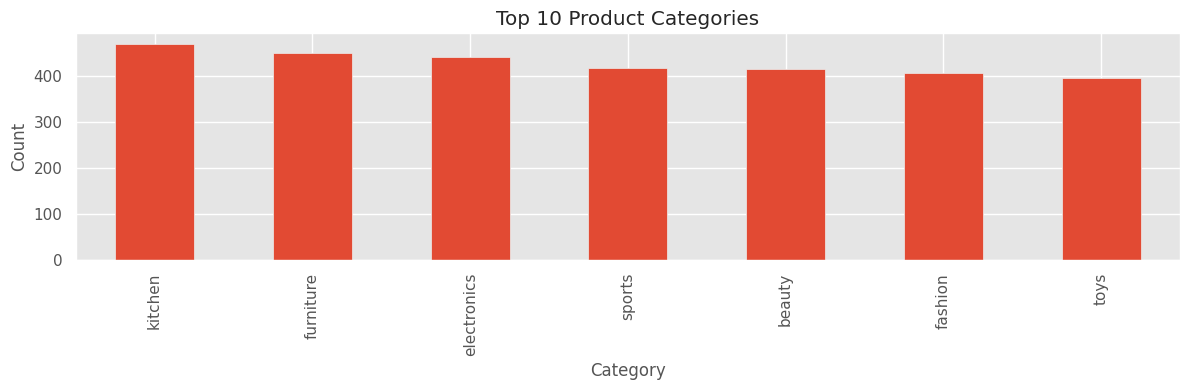

,Count
product_category_name,
kitchen,470
furniture,450
electronics,442
sports,418
beauty,415
fashion,408
toys,397


In [82]:
plt.figure(figsize=(12,4))
data['product_category_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

data['product_category_name'].value_counts().to_frame("Count")

### Step 4: Price and Quantity Relationship

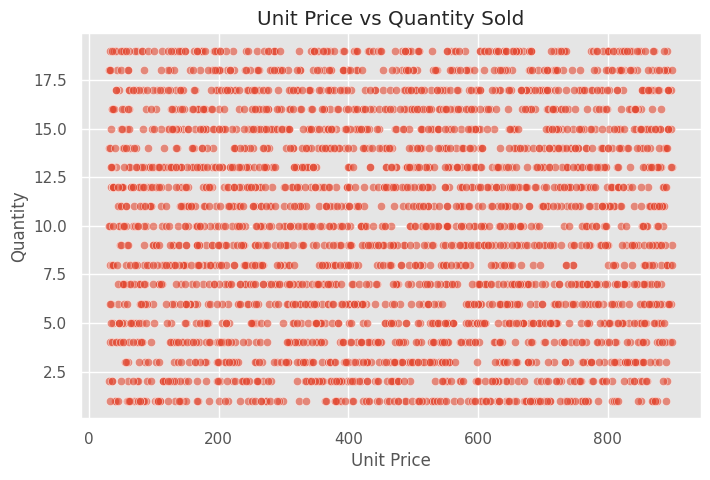

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['unit_price'], y=data['qty'], alpha=0.6)
plt.title("Unit Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()

### Step 5: Seasonal Trend Line Chart

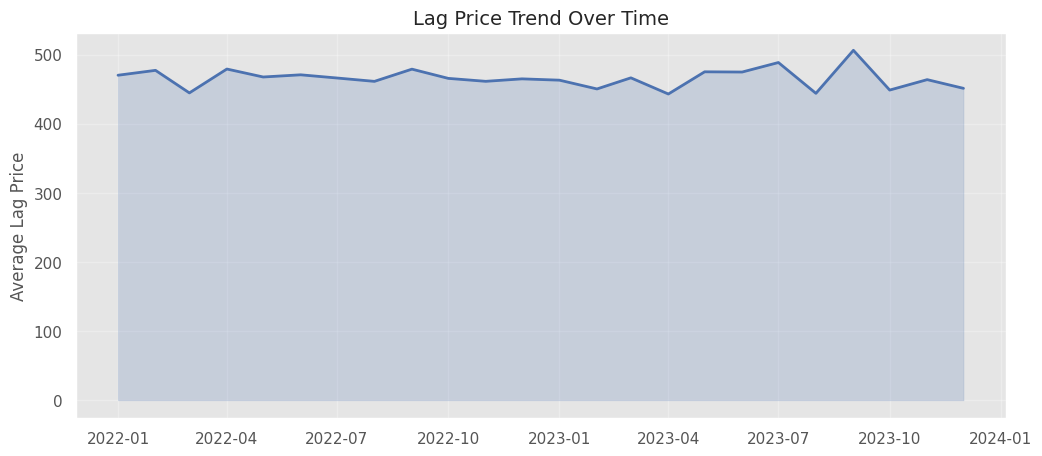

In [84]:
monthly = data.groupby(data['month_year'].dt.to_period("M"))['lag_price'].mean()
monthly.index = monthly.index.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, color="#4C72B0", linewidth=2)
plt.fill_between(monthly.index, monthly.values, color="#4C72B0", alpha=0.2)
plt.title("Lag Price Trend Over Time", fontsize=14)
plt.ylabel("Average Lag Price")
plt.grid(alpha=0.3)
plt.show()

### Step 6: Competitor Price Heatmap

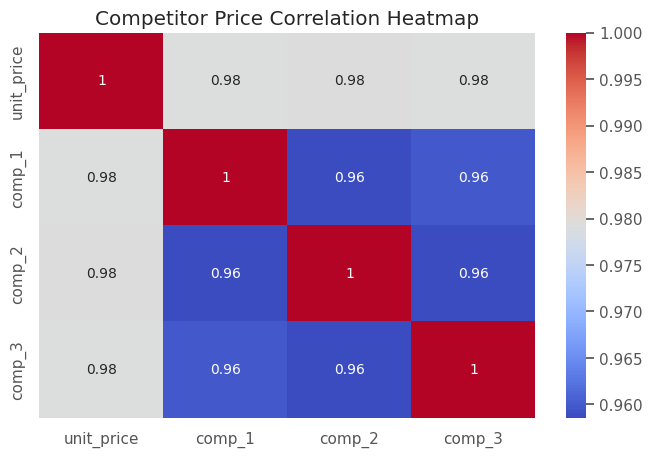

In [85]:
comp_df = data[['unit_price','comp_1','comp_2','comp_3']]
plt.figure(figsize=(8,5))
sns.heatmap(comp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Competitor Price Correlation Heatmap")
plt.show()

### Step 7: Competitor Radar Chart

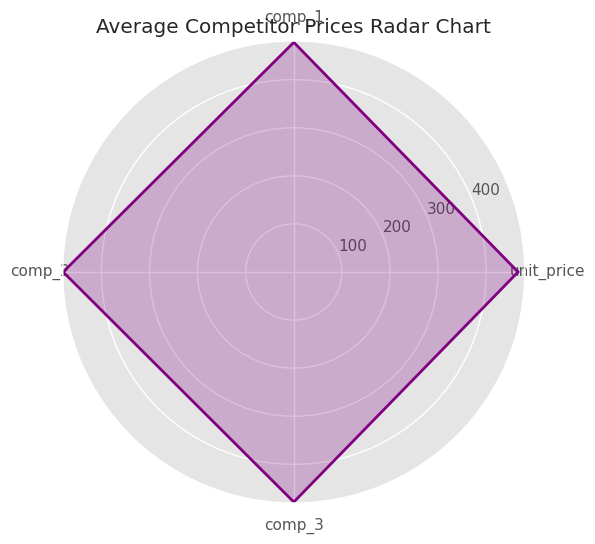

In [86]:
comp_cols = ['unit_price','comp_1','comp_2','comp_3']
comp_means = data[comp_cols].mean().values

angles = np.linspace(0, 2*np.pi, len(comp_cols), endpoint=False)
stats = np.concatenate((comp_means,[comp_means[0]]))
angles = np.concatenate((angles,[angles[0]]))

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, linewidth=2, color="purple")
ax.fill(angles, stats, alpha=0.25, color="purple")
ax.set_thetagrids(angles[:-1]*180/np.pi, comp_cols)
plt.title("Average Competitor Prices Radar Chart")
plt.show()

### Step 8: Category Treemap

In [87]:
fig = px.treemap(
    data,
    path=['product_category_name'],
    values='qty',
    color='qty',
    color_continuous_scale='tempo'
)
fig.show()

### Step 9: Key Price Variables

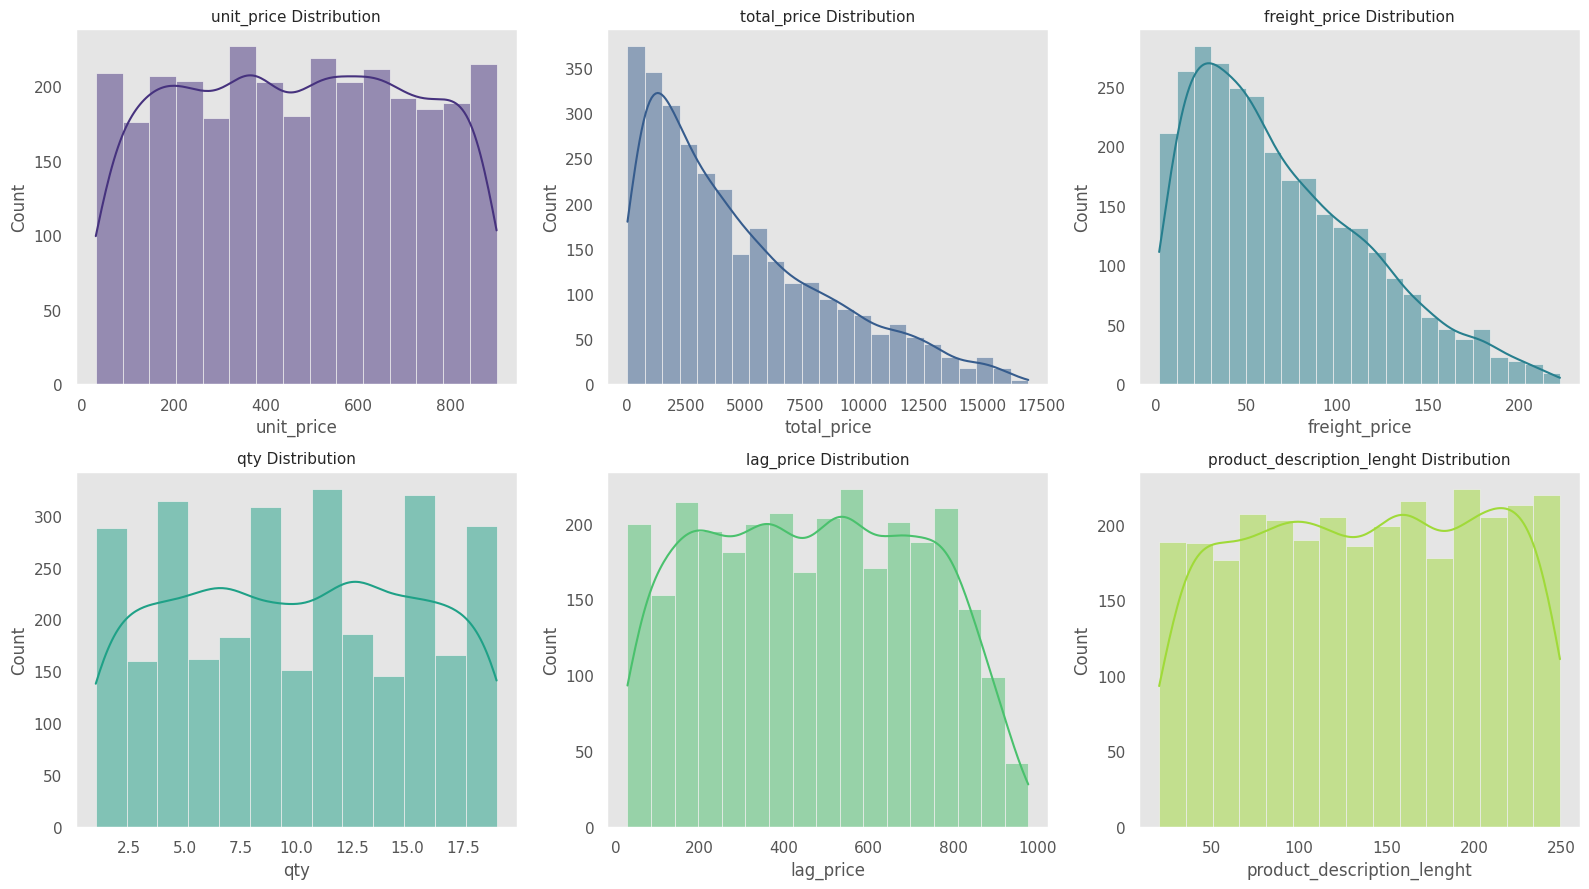

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(16,9))
cols = ['unit_price','total_price','freight_price','qty','lag_price','product_description_lenght']

colors = sns.color_palette("viridis", 6)

for ax, col, c in zip(axes.flatten(), cols, colors):
    sns.histplot(data[col], kde=True, color=c, ax=ax)
    ax.set_title(f"{col} Distribution", fontsize=11)
    ax.grid(False)

plt.tight_layout()
plt.show()

### Step 10: Relationship Visual

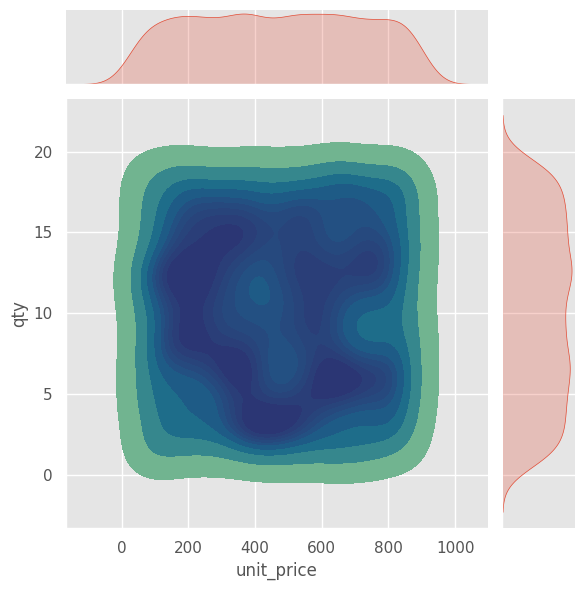

In [89]:
sns.jointplot(
    data=data,
    x="unit_price",
    y="qty",
    kind="kde",
    fill=True,
    cmap="crest"
)

# PHASE 2: DATA PREPROCESSING

### Step 1: Clean Missing Values

In [90]:
# Numeric → Median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Categorical → Mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Competitor prices → Forward fill (they behave like time-driven features)
comp_cols = ['comp_1','comp_2','comp_3','ps1','ps2','ps3','fp1','fp2','fp3']
for c in comp_cols:
    if c in data.columns:
        data[c] = data[c].fillna(method='ffill')

### Step 2: Category Encoding

In [91]:
if 'product_category_name' in data.columns:
    data = pd.get_dummies(data, columns=['product_category_name'], drop_first=True)

### Step 3: Date Features

In [92]:
data['year'] = data['month_year'].dt.year
data['month'] = data['month_year'].dt.month
data['weekday'] = data['month_year'].dt.weekday
data['is_weekend'] = (data['weekday'] >= 5).astype(int)
data['quarter'] = data['month'].apply(lambda x: (x - 1)//3 + 1)
data['is_peak_season'] = data['month'].isin([10,11,12,1]).astype(int)

### Step 4: Outlier Handling

In [93]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in ['unit_price', 'total_price', 'freight_price', 'qty']:
    if col in data.columns:
        cap_outliers(data, col)

### Step 5: Fix Data Types

In [94]:
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except:
            pass

### Step 6: Drop Unused Columns

In [95]:
data = data.drop(['month_year','product_id'], axis=1)

# PHASE 3: FEATURE ENGINEERING

### Step 1: Moving Averages

In [96]:
data['price_ma_3'] = data['unit_price'].rolling(window=3, min_periods=1).mean()
data['price_ma_7'] = data['unit_price'].rolling(window=7, min_periods=1).mean()

### Step 2: Competitor Price Differences

In [97]:
data['comp1_diff'] = data['unit_price'] - data['comp_1']
data['comp2_diff'] = data['unit_price'] - data['comp_2']
data['comp3_diff'] = data['unit_price'] - data['comp_3']

### Step 3: Competitor Advantage Index

In [98]:
data['comp_advantage'] = data['unit_price'] - data[['comp_1','comp_2','comp_3']].mean(axis=1)

### Step 4: Rolling Demand Features

In [99]:
data['qty_ma_3'] = data['qty'].rolling(3, min_periods=1).mean()
data['qty_ma_7'] = data['qty'].rolling(7, min_periods=1).mean()

### Step 5: Margin Feature

In [100]:
data['margin'] = data['unit_price'] - data['freight_price']
data['margin_pct'] = data['margin'] / (data['unit_price'] + 1)

### Step 6: Freight Ratio

In [101]:
data['freight_ratio'] = data['freight_price'] / (data['unit_price'] + 1)

### Step 7: Competitor Gap Percentage

In [102]:
data['comp_gap_pct'] = (data['unit_price'] - data[['comp_1','comp_2','comp_3']].mean(axis=1)) / \
                        (data[['comp_1','comp_2','comp_3']].mean(axis=1) + 1)

### Step 8: Market Competitor Price Index

In [103]:
data['comp_index'] = data[['comp_1','comp_2','comp_3']].mean(axis=1)

### Step 9: Price Volatility

In [104]:
data['price_volatility'] = data['unit_price'].rolling(window=5, min_periods=1).std().fillna(0)

### Step 10: Demand Elasticity Proxy

In [105]:
data['elasticity_proxy'] = data['qty_ma_3'] / (data['unit_price'] + 1)

### Step 11: Interaction Features

In [106]:
data['price_qty_interaction'] = data['unit_price'] * data['qty']
data['price_comp_interaction'] = data['unit_price'] * data['comp_index']

### Step 12: Lag Feature

In [107]:
data['unit_price_lag1'] = data['unit_price'].shift(1).fillna(data['unit_price'].median())

### Step 13: Define Features & Target

In [108]:
X = data.drop('lag_price', axis=1)
y = data['lag_price']

# PHASE 4: MODEL DEVELOPEMENT

### Step 1: Train Test Split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Scaling

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Linear Regression

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_pred = lin_reg.predict(X_test_scaled)

### Step 4: Ridge Regression

In [112]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

### Step 5: Random Forest

In [113]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# PHASE 5: MODEL EVALUATION

### Step 1: Define Evaluation Function

In [114]:
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return [model_name, r2, mae, rmse]

### Step 2: Evaluate All Models

In [115]:
results = []

results.append(evaluate_model("Linear Regression", y_test, lin_pred))
results.append(evaluate_model("Ridge Regression", y_test, ridge_pred))
results.append(evaluate_model("Random Forest", y_test, rf_pred))

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "RMSE"])
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.986383,22.466928,29.488133
1,Ridge Regression,0.986382,22.467712,29.488485
2,Random Forest,0.985660,22.851356,30.260289


### Step 3: Prediction vs Actual Plot

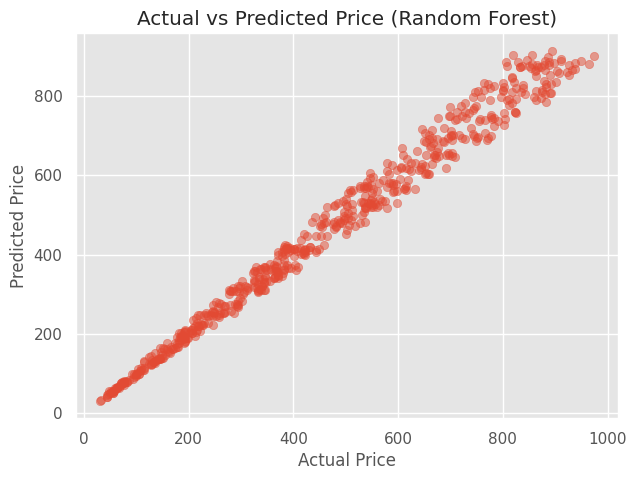

In [116]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.show()

### Step 4: Model Performance Comparison Charts

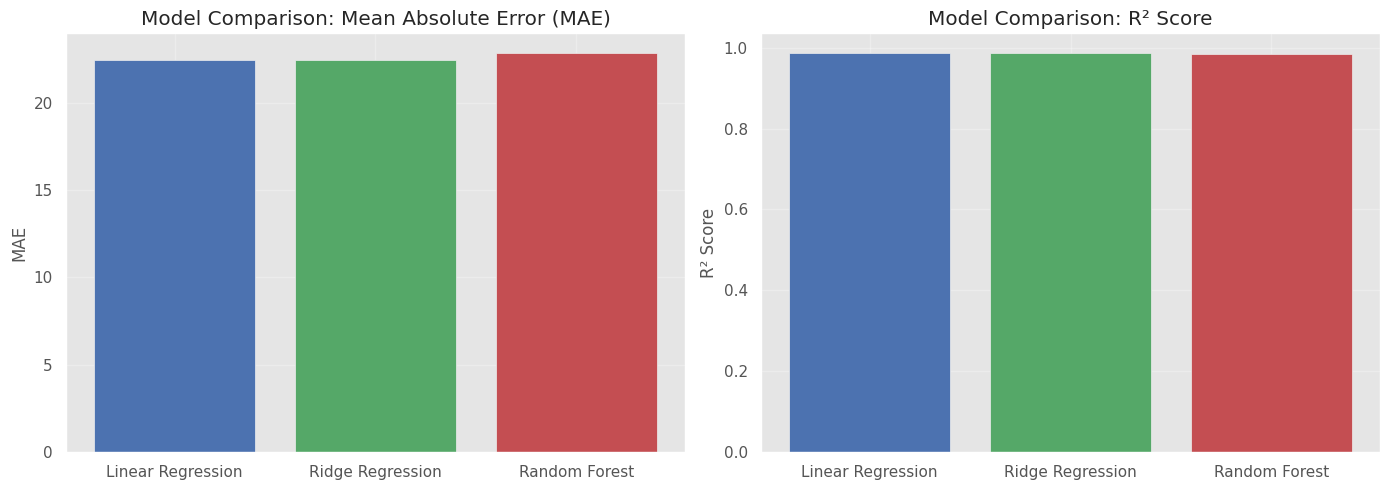

In [117]:
# MAE & R2 Visualization
metrics_df = results_df.set_index("Model")

plt.figure(figsize=(14,5))

# MAE Chart
plt.subplot(1,2,1)
plt.bar(metrics_df.index, metrics_df["MAE"], color=['#4C72B0','#55A868','#C44E52'])
plt.title("Model Comparison: Mean Absolute Error (MAE)")
plt.ylabel("MAE")
plt.grid(alpha=0.3)

# R2 Chart
plt.subplot(1,2,2)
plt.bar(metrics_df.index, metrics_df["R2 Score"], color=['#4C72B0','#55A868','#C44E52'])
plt.title("Model Comparison: R² Score")
plt.ylabel("R² Score")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# PHASE 6: MODEL EXPLAINABILITY

### Step 1: SHAP

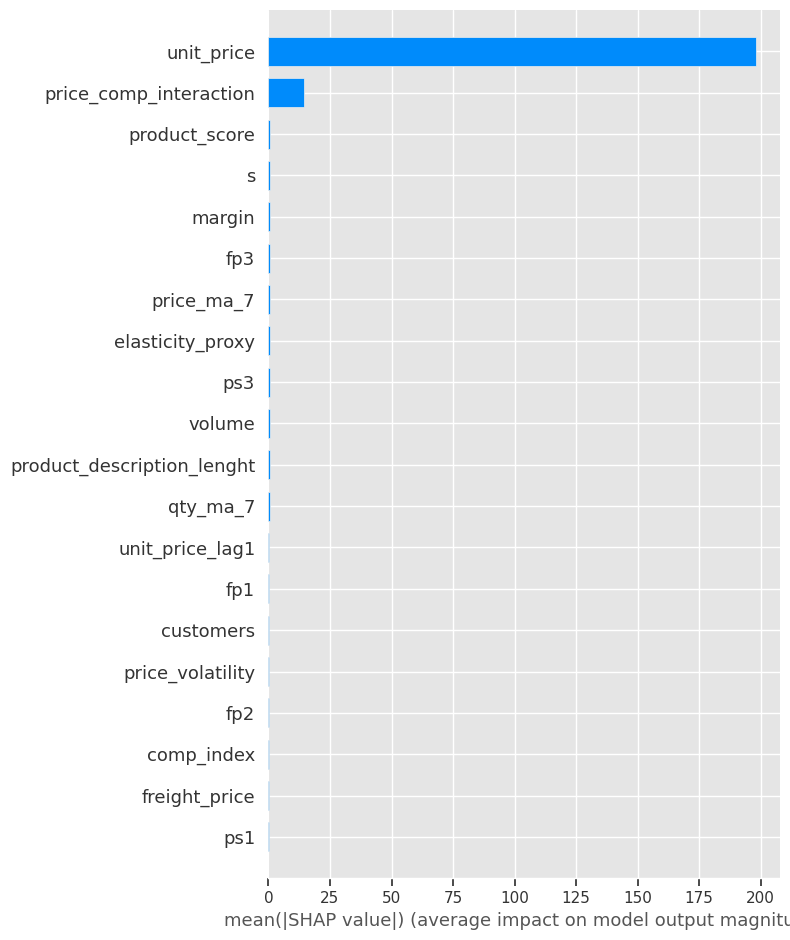

,qty,unit_price,freight_price,total_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,margin,margin_pct,freight_ratio,comp_gap_pct,comp_index,price_volatility,elasticity_proxy,price_qty_interaction,price_comp_interaction,unit_price_lag1
0,-0.034718,-9.582999,-0.041854,0.046150,-0.268590,0.013177,-0.108698,0.209022,0.256551,0.076358,...,0.184908,0.082830,0.186352,-0.268662,0.210439,-0.339693,-0.269429,0.038613,13.498497,0.272302
1,-0.086663,32.174683,-0.329176,-0.046511,0.015126,-0.225294,-0.014124,0.052904,0.192552,-0.364640,...,-0.878024,-0.104840,-0.069094,0.049575,0.020927,-1.054820,-6.014167,-0.075165,9.713292,0.116588
2,0.105353,-198.095097,-0.176729,0.150379,0.537667,0.049014,-0.197017,0.165411,-0.215612,0.085231,...,-0.173965,0.172905,0.108089,-0.018100,0.367658,0.148507,-0.081640,0.032791,5.666551,-0.009113
3,0.074643,184.117604,-0.282314,-0.362070,-0.808656,-1.539439,-0.317287,-0.213508,-0.317812,-0.765511,...,-0.101944,-0.078499,-0.058525,-0.248848,-0.168265,-0.148561,0.322310,-0.284367,11.215488,-3.251891
4,-0.120925,314.446918,0.159650,-0.220980,-1.509803,-1.040849,0.078584,-0.239626,0.072092,-0.817285,...,0.216273,-0.054344,-0.102171,-0.863441,0.201867,-0.497237,0.026478,-0.623867,18.362392,-0.835383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.057019,329.119634,0.479094,-0.259694,-0.086234,1.108128,-0.494606,0.294936,0.671290,-0.017920,...,0.418236,0.117265,-0.012732,-0.040219,0.576587,0.165885,0.696795,-0.373749,19.758928,-0.298979
196,0.105019,-18.149772,0.637241,0.017831,0.063810,-0.050023,-0.048832,-0.274050,-0.302828,1.336741,...,1.331680,0.535666,0.360808,0.027447,0.473275,-0.180365,0.005348,0.117876,15.398232,0.291344
197,-0.090885,385.411924,0.660428,-0.490617,0.922517,0.002921,0.671727,-0.566701,-0.095781,0.473921,...,0.554410,0.355523,0.118991,0.451427,0.449690,1.591955,-0.138345,-0.090658,22.709246,0.138622
198,-0.026769,-170.537522,-0.327618,-0.248670,-0.727843,-0.701624,-0.048153,-0.348021,-0.033053,-0.174750,...,-0.174703,-0.069575,-0.036629,0.067386,-0.327021,0.035261,-0.369928,-0.096140,4.842585,-0.114595


In [118]:
sample_X = X_train.sample(200, random_state=42)
sample_y = y_train.loc[sample_X.index]

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(sample_X)

shap.summary_plot(shap_values, sample_X, plot_type="bar")

shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df

### Step 2: SHAP Force Plot

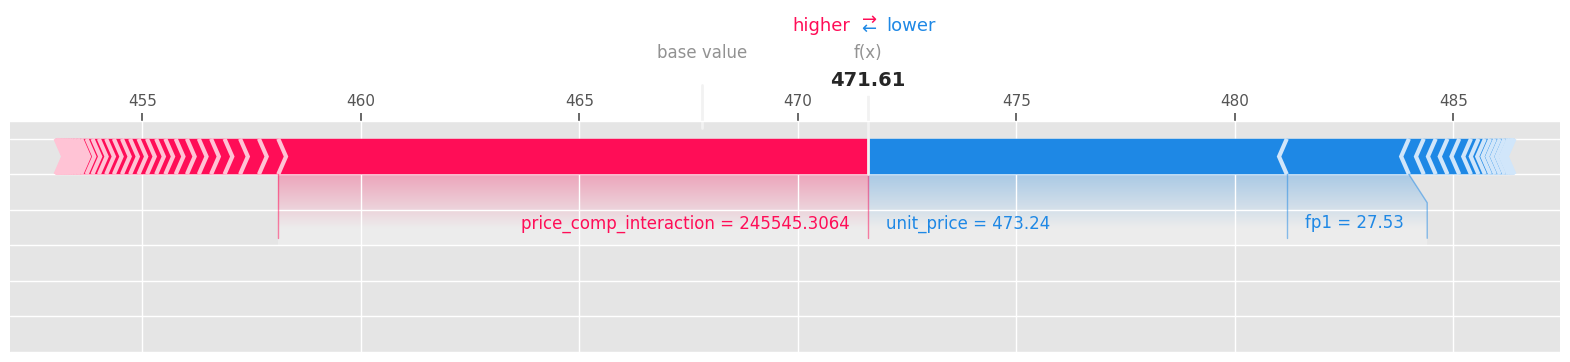

In [119]:
shap.initjs()
sample_idx = sample_X.index[0]
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    sample_X.iloc[0],
    matplotlib=True
)

### Step 3: SHAP Waterfall PLot

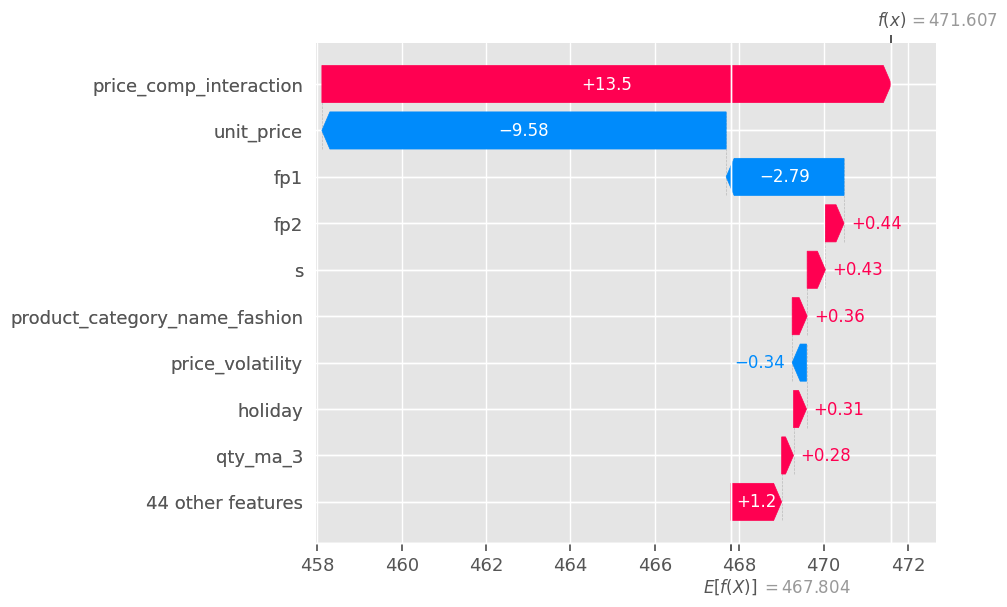

In [120]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[0],
    shap_values[0],
    feature_names=sample_X.columns
)

### Step 4: SHAP Top Features Drivers Table

In [121]:
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    "Feature": sample_X.columns,
    "Mean |SHAP|": mean_abs_shap
}).sort_values("Mean |SHAP|", ascending=False)

shap_importance_df.head(15)

,Feature,Mean |SHAP|
1,unit_price,197.914854
51,price_comp_interaction,14.544491
8,product_score,0.601829
15,s,0.553160
43,margin,0.522652
25,fp3,0.482882
36,price_ma_7,0.471756
49,elasticity_proxy,0.466694
24,ps3,0.463955
16,volume,0.455594


### Step 5: Permutation Importance

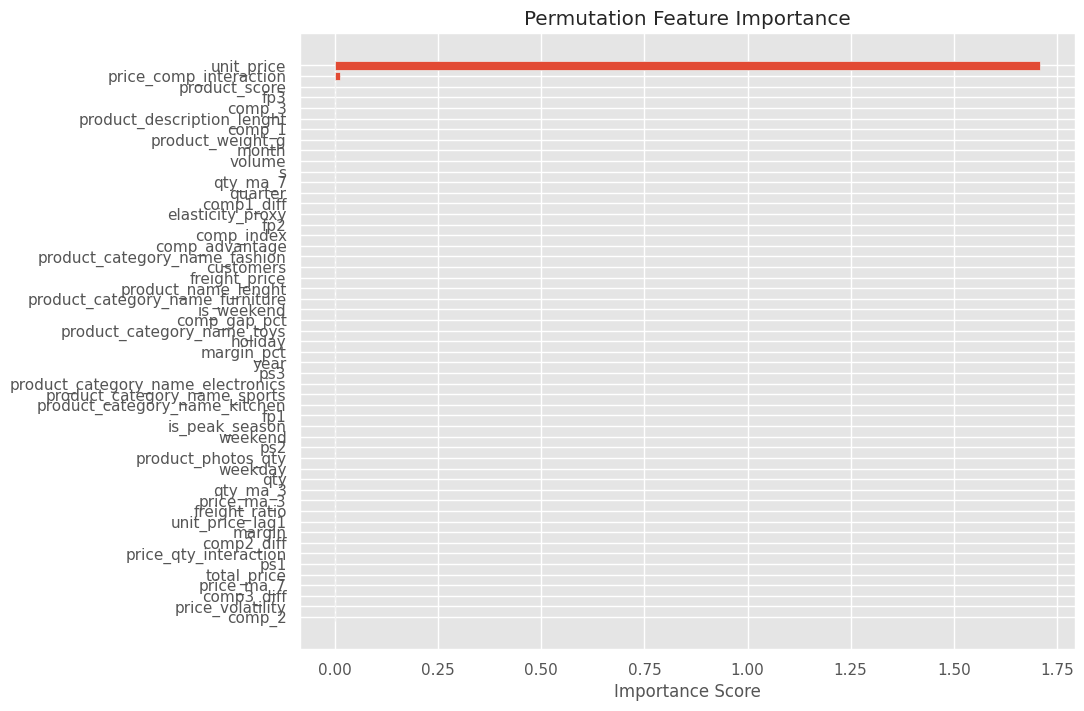

,Feature,Importance
20,comp_2,-1.098828e-04
48,price_volatility,-1.058695e-04
39,comp3_diff,-7.238599e-05
36,price_ma_7,-7.010031e-05
3,total_price,-4.962906e-05
18,ps1,-4.149300e-05
50,price_qty_interaction,-3.888455e-05
38,comp2_diff,-3.772288e-05
43,margin,-3.228266e-05
52,unit_price_lag1,-3.006861e-05


In [122]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

pi_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(pi_df["Feature"], pi_df["Importance"])
plt.title("Permutation Feature Importance")
plt.xlabel("Importance Score")
plt.show()

pi_df

# PHASE 7: MODEL VISUALIZATION AND SELECTION

### Step 1: Prediction vs Actual

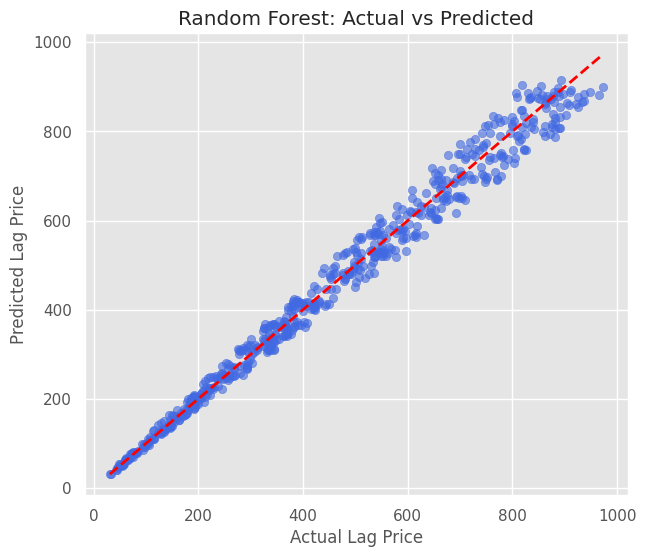

In [123]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, rf_pred, alpha=0.6, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Lag Price")
plt.ylabel("Predicted Lag Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

### Step 2: Model Selection

In [124]:
model_scores = {
    "Linear Regression": (r2_score(y_test, lin_pred), mean_absolute_error(y_test, lin_pred)),
    "Ridge Regression": (r2_score(y_test, ridge_pred), mean_absolute_error(y_test, ridge_pred)),
    "Random Forest": (r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred))
}

# Select best model by R2, then MAE
best_model_name = max(model_scores, key=lambda m: (model_scores[m][0], -model_scores[m][1]))
best_model = {"Linear Regression": lin_reg, "Ridge Regression": ridge, "Random Forest": rf}[best_model_name]

print("Best Model Selected:", best_model_name)

Best Model Selected: Linear Regression


# PHASE 8: BUSINESS PRICING INSIGHTS ENGINE

### Step 1: Price Optimization Insights

In [125]:
# 1. Reload raw dataset to get product_id and category names
orig = pd.read_csv("retail_price.csv")
orig['month_year'] = pd.to_datetime(orig['month_year'], errors='coerce')

# 2. Apply same outlier filtering done earlier
Q1 = orig['unit_price'].quantile(0.25)
Q3 = orig['unit_price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

orig = orig[(orig['unit_price'] >= lower) & (orig['unit_price'] <= upper)].copy()
orig = orig.reset_index(drop=True)

# Ensure lengths match with processed data (X)
orig = orig.iloc[:len(X)].reset_index(drop=True)


def generate_pricing_insights(model, original_display_df, X_features):
    price_changes = np.linspace(-0.20, 0.20, 9)
    insights = []

    for idx in range(min(5, len(X_features))):
        disp = original_display_df.iloc[idx]
        base = X_features.iloc[idx:idx+1].copy()

        info = {
            "product_id": disp["product_id"],
            "category": disp["product_category_name"],
            "current_price": disp["unit_price"],
            "current_qty": disp["qty"],
            "scenarios": []
        }

        for change in price_changes:
            new_price = disp['unit_price'] * (1 + change)

            scenario = base.copy()
            scenario['total_price'] = new_price * disp['qty']
            scenario['price_qty_interaction'] = new_price * disp['qty']
            scenario['margin'] = new_price - disp['freight_price']
            scenario['comp1_diff'] = new_price - disp['comp_1']
            scenario['comp2_diff'] = new_price - disp['comp_2']
            scenario['comp3_diff'] = new_price - disp['comp_3']

            pred_next = model.predict(scenario)[0]
            est_rev = new_price * disp['qty']

            info["scenarios"].append({
                "price_change_pct": round(change * 100, 1),
                "new_price": round(new_price, 2),
                "predicted_next_period_price": round(pred_next, 2),
                "estimated_revenue": round(est_rev, 2)
            })

        insights.append(info)

    return insights


pricing_insights = generate_pricing_insights(best_model, orig, X)

# Display first 2 products
pricing_insights[:2]

[{'product_id': 'bed1',
  'category': 'bed_bath_table',
  'current_price': np.float64(45.95),
  'current_qty': np.int64(1),
  'scenarios': [{'price_change_pct': np.float64(-20.0),
    'new_price': np.float64(36.76),
    'predicted_next_period_price': np.float64(874303.66),
    'estimated_revenue': np.float64(36.76)},
   {'price_change_pct': np.float64(-15.0),
    'new_price': np.float64(39.06),
    'predicted_next_period_price': np.float64(874452.4),
    'estimated_revenue': np.float64(39.06)},
   {'price_change_pct': np.float64(-10.0),
    'new_price': np.float64(41.36),
    'predicted_next_period_price': np.float64(874601.13),
    'estimated_revenue': np.float64(41.36)},
   {'price_change_pct': np.float64(-5.0),
    'new_price': np.float64(43.65),
    'predicted_next_period_price': np.float64(874749.86),
    'estimated_revenue': np.float64(43.65)},
   {'price_change_pct': np.float64(0.0),
    'new_price': np.float64(45.95),
    'predicted_next_period_price': np.float64(874898.6),
   

### Step 2: Pricing Insights Table

In [126]:
def format_pricing_table(pricing_insights, product_index=0):
    """Return a clean table for a given product index."""
    item = pricing_insights[product_index]
    df = pd.DataFrame(item["scenarios"])
    df["product_id"] = item["product_id"]
    df["category"] = item["category"]
    df["current_price"] = item["current_price"]
    df["current_qty"] = item["current_qty"]
    return df[[
        "product_id",
        "category",
        "current_price",
        "current_qty",
        "price_change_pct",
        "new_price",
        "predicted_next_period_price",
        "estimated_revenue"
    ]]

# Display table for first product
format_pricing_table(pricing_insights, product_index=0)

,product_id,category,current_price,current_qty,price_change_pct,new_price,predicted_next_period_price,estimated_revenue
0,bed1,bed_bath_table,45.95,1,-20.0,36.76,874303.66,36.76
1,bed1,bed_bath_table,45.95,1,-15.0,39.06,874452.40,39.06
2,bed1,bed_bath_table,45.95,1,-10.0,41.36,874601.13,41.36
3,bed1,bed_bath_table,45.95,1,-5.0,43.65,874749.86,43.65
4,bed1,bed_bath_table,45.95,1,0.0,45.95,874898.60,45.95
5,bed1,bed_bath_table,45.95,1,5.0,48.25,875047.33,48.25
6,bed1,bed_bath_table,45.95,1,10.0,50.55,875196.06,50.55
7,bed1,bed_bath_table,45.95,1,15.0,52.84,875344.79,52.84
8,bed1,bed_bath_table,45.95,1,20.0,55.14,875493.53,55.14


### Step 3: Price Optimization Visual Dashboard

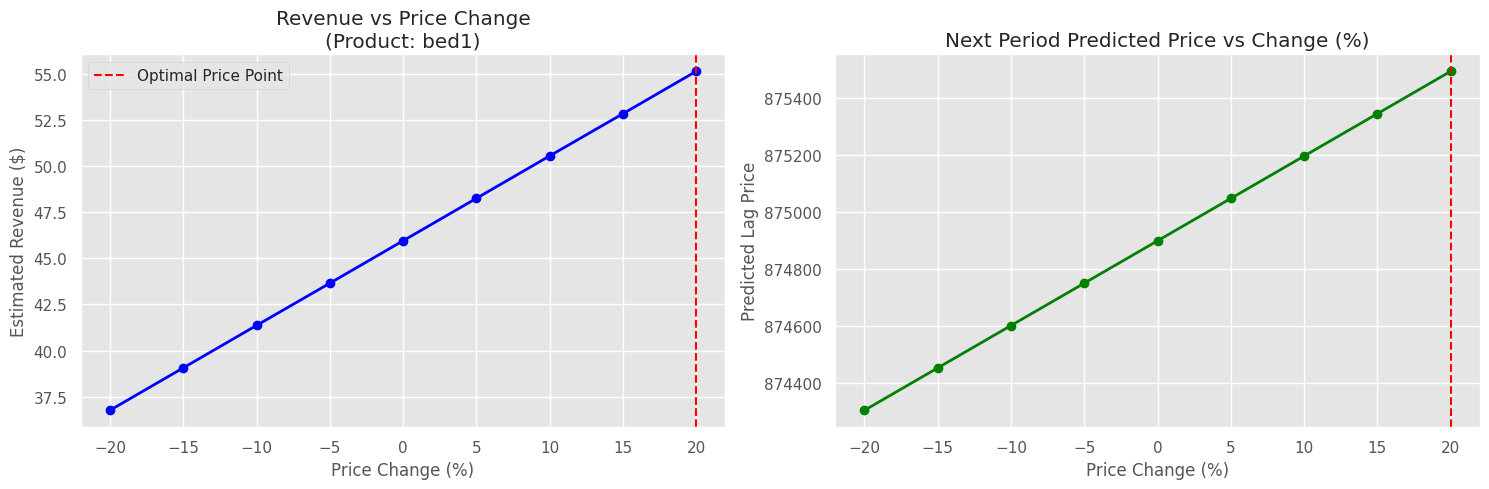

In [127]:
def plot_pricing_scenarios(pricing_insights, product_index=0):

    item = pricing_insights[product_index]
    changes = [s["price_change_pct"] for s in item["scenarios"]]
    revenues = [s["estimated_revenue"] for s in item["scenarios"]]
    pred_next = [s["predicted_next_period_price"] for s in item["scenarios"]]

    best_scenario = max(item["scenarios"], key=lambda x: x["estimated_revenue"])

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1 — Revenue Curve
    ax[0].plot(changes, revenues, marker="o", linewidth=2, color="blue")
    ax[0].axvline(best_scenario["price_change_pct"], color="red", linestyle="--", label="Optimal Price Point")
    ax[0].set_title(f"Revenue vs Price Change\n(Product: {item['product_id']})")
    ax[0].set_xlabel("Price Change (%)")
    ax[0].set_ylabel("Estimated Revenue ($)")
    ax[0].grid(True)
    ax[0].legend()

    # Plot 2 — Next Period Price Prediction
    ax[1].plot(changes, pred_next, marker="o", linewidth=2, color="green")
    ax[1].axvline(best_scenario["price_change_pct"], color="red", linestyle="--")
    ax[1].set_title("Next Period Predicted Price vs Change (%)")
    ax[1].set_xlabel("Price Change (%)")
    ax[1].set_ylabel("Predicted Lag Price")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


# Show dashboard for first product
plot_pricing_scenarios(pricing_insights, product_index=0)

# PHASE 9: STRATEGIC PRICING RECOMMENDATIONS

In [128]:
# STEP 7.8: STRATEGIC PRICING RECOMMENDATIONS

def generate_recommendations(pricing_insights):

    optimal_changes = []
    revenue_impacts = []

    for item in pricing_insights:
        best = max(item["scenarios"], key=lambda x: x["estimated_revenue"])
        optimal_changes.append(best["price_change_pct"])
        current_rev = item["current_price"] * item["current_qty"]
        rev_change = ((best["estimated_revenue"] - current_rev) / (current_rev + 1e-6)) * 100
        revenue_impacts.append(rev_change)

    avg_change = np.mean(optimal_changes)
    avg_rev_gain = np.mean(revenue_impacts)

    print("\nSTRATEGIC PRICING SUMMARY")
    print(f"Average Optimal Price Adjustment: {avg_change:+.2f}%")
    print(f"Average Expected Revenue Impact: {avg_rev_gain:+.2f}%")

    print("\nRECOMMENDED STRATEGY:")

    if avg_change > 5:
        print("-> Market supports higher pricing")
        print("1. Gradual price increase recommended")
        print("2. Emphasize value proposition in marketing")
        print("3. Monitor competitor reactions")

    elif avg_change < -5:
        print("-> Competitive pressure suggests lower pricing")
        print("1. Targeted price reductions may boost volume")
        print("2. Combine with promotions for maximum effect")

    else:
        print("-> Stable pricing recommended")
        print("1. Maintain current strategy")
        print("2. Optimize customer retention & loyalty programs")

    print("\n============================================================")


# Generate final strategic insights
generate_recommendations(pricing_insights)


STRATEGIC PRICING SUMMARY
Average Optimal Price Adjustment: +20.00%
Average Expected Revenue Impact: +20.00%

RECOMMENDED STRATEGY:
-> Market supports higher pricing
1. Gradual price increase recommended
2. Emphasize value proposition in marketing
3. Monitor competitor reactions



# PHASE 10: MODEL SAVING

In [129]:
joblib.dump(best_model, "retail_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


# PHASE 11: MODEL DEPLOYMENT

### Step 1: Create Flask API

In [130]:
%%writefile app.py

app = Flask(__name__)

# Load model & scaler
model = joblib.load("retail_price_model.pkl")
scaler = joblib.load("scaler.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json

    # Convert input to DataFrame
    df = pd.DataFrame([data])

    # Scale numeric fields
    df_scaled = scaler.transform(df)

    # Predict lag price
    prediction = model.predict(df_scaled)[0]

    return jsonify({
        "predicted_lag_price": float(prediction)
    })

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)

Overwriting app.py


### Step 2: Create Dockerfile for Deployment

In [131]:
%%writefile Dockerfile
FROM python:3.10

WORKDIR /app

COPY . /app

RUN pip install flask pandas joblib scikit-learn

EXPOSE 5000

CMD ["python", "app.py"]

Overwriting Dockerfile


### Step 3: How to Build & Run Docker Container

In [132]:
print("""
To build the Docker image:
------------------------------------
docker build -t retail-price-model .

To run the container:
------------------------------------
docker run -p 5000:5000 retail-price-model

To test the API:
------------------------------------
Send POST request to http://localhost:5000/predict

Example JSON:
{
    "unit_price": 50,
    "qty": 3,
    "freight_price": 5,
    ...
}
""")


To build the Docker image:
------------------------------------
docker build -t retail-price-model .

To run the container:
------------------------------------
docker run -p 5000:5000 retail-price-model

To test the API:
------------------------------------
Send POST request to http://localhost:5000/predict

Example JSON:
{
    "unit_price": 50,
    "qty": 3,
    "freight_price": 5,
    ...
}

